### Pandas x Dictionary

Nós terminamos a aula anterior apresentando um dictionário (dictionary) para vocês.

Há dois tipos de dicionário:
  - Não ordenado
  - Ordenado

In [1]:
import os, sys
import pandas as pd # pandas e seu alias pd
import numpy as np  # numpy  e seu alias np

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### Dicionário não ordenado

você pode inicializá-lo de duas formas:
  - meu_dic = dict()
  - meu_dic = {}
  
abaixo crio um dictionary com nome 'dic' não confunda com o método 'dict()' que tem um t a mais.

In [2]:
dic = {}
dic['a'] = 0
dic['b'] = 1
dic['c'] = 2

len(dic)

3

### Outra forma de construir um dicionário

In [3]:
dic = {'a':0, 'b':1, 'c':2}
type(dic), dic

(dict, {'a': 0, 'b': 1, 'c': 2})

### Olhando o conteúdo usando a chave (key)

In [4]:
for key in dic.keys():
    print(key)

a
b
c


### Pesquisando 'chave' (key) e 'valor' (dic[key])

In [5]:
for key in dic.keys():
    print(key, dic[key])

a 0
b 1
c 2


### Usando items() - mais fácil, rápido e seguro

In [6]:
for key, val in dic.items():
    print(key, val)

a 0
b 1
c 2


### Porque um dicionário é importante para o Pandas?
### Vamos construir um dicionário mais complexo e tranformá-lo numa tabela Pandas

In [7]:
## 4 animais, a1 ... a4

dic = {}
dic['a1'] = [3.26, 'cm', 'cinza', '223.4', 'g']
dic['a2'] = [4.26, 'cm', 'cinza rajado', '242.3', 'g']
dic['a3'] = [3.76, 'cm', 'cinza', '278.8', 'g']
dic['a4'] = [4.58, 'cm', 'cinza, preto e laranja', '305.1', 'g']
len(dic), dic.keys()

(4, dict_keys(['a1', 'a2', 'a3', 'a4']))

### Veja pandas to_dict()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html  
https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe

In [8]:
df = pd.DataFrame.from_dict(dic)
df

,a1,a2,a3,a4
0,3.26,4.26,3.76,4.58
1,cm,cm,cm,cm
2,cinza,cinza rajado,cinza,"cinza, preto e laranja"
3,223.4,242.3,278.8,305.1
4,g,g,g,g


### Transpondo a tabela (rodando 90 graus)

In [9]:
df = pd.DataFrame.from_dict(dic).T
df

,0,1,2,3,4
a1,3.26,cm,cinza,223.4,g
a2,4.26,cm,cinza rajado,242.3,g
a3,3.76,cm,cinza,278.8,g
a4,4.58,cm,"cinza, preto e laranja",305.1,g


### Clocando nomes

In [10]:
df = pd.DataFrame.from_dict(dic).T
df.columns = ['comprimento', 'uni_comp', 'cor', 'peso', 'uni_peso']
df

,comprimento,uni_comp,cor,peso,uni_peso
a1,3.26,cm,cinza,223.4,g
a2,4.26,cm,cinza rajado,242.3,g
a3,3.76,cm,cinza,278.8,g
a4,4.58,cm,"cinza, preto e laranja",305.1,g


### Outra forma de usar dicionário x tabela Pandas

vendo conteúdo do index e de colunas (pd.Series)

In [11]:
df.index

Index(['a1', 'a2', 'a3', 'a4'], dtype='object')

In [12]:
list(df.uni_peso)

['g', 'g', 'g', 'g']

In [13]:
dic = {}
dic['animal'] = ['a1', 'a2', 'a3', 'a4']
dic['peso'] = [3.26, 4.26, 3.76, 4.48]
dic['uni_comp'] = ['cm', 'cm', 'cm', 'cm']
dic['cor'] = ['cinza', 'cinza rajado', 'cinza', 'cinza, preto e laranja']
dic['peso'] = [223.4, 242.3, 278.8, 305.1]
dic['uni_peso'] = ['g', 'g', 'g', 'g']

df = pd.DataFrame.from_dict(dic)
df

,animal,peso,uni_comp,cor,uni_peso
0,a1,223.4,cm,cinza,g
1,a2,242.3,cm,cinza rajado,g
2,a3,278.8,cm,cinza,g
3,a4,305.1,cm,"cinza, preto e laranja",g


### Peso médio, desvio padrão amostral, mediana

In [14]:
df.peso.mean()

262.4

In [15]:
df.peso.std()

36.59353312631437

In [16]:
df.peso.median()

260.55

### Desafio:
  - o que é:
        - Média?
        - Desvio padrão amostral?
        - Mediana?

In [17]:
"O peso médio das %d cobras é %.1f (%.1f)"%(len(df), df.peso.mean(), df.peso.std())

'O peso médio das 4 cobras é 262.4 (36.6)'

### Criando cobras com a distribuição normal

In [18]:
dic = {}
N = 30

dic['id'] = np.arange(0, N)
dic['peso'] = np.random.normal(5, .5, N)
dic['comprimento'] = np.random.normal(2, .4, N)

df = pd.DataFrame.from_dict(dic)
df.head()

,id,peso,comprimento
0,0,4.672961,1.985819
1,1,4.209098,1.700818
2,2,5.922821,1.046637
3,3,4.712433,1.847114
4,4,4.656770,2.033226


In [19]:
"O peso médio das %d cobras é %.1f (%.1f)"%(len(df), df.peso.mean(), df.peso.std())

'O peso médio das 30 cobras é 5.0 (0.4)'

In [20]:
"O comprimento médio das %d cobras é %.1f (%.1f)"%(len(df), df.comprimento.mean(), df.comprimento.std())

'O comprimento médio das 30 cobras é 1.8 (0.4)'

### N=30 aproximando da normalidade (distribuição normal)

(array([2., 1., 0., 6., 4., 7., 5., 3., 1., 1.]),
 array([0.92010029, 1.10190983, 1.28371937, 1.46552891, 1.64733845,
        1.82914798, 2.01095752, 2.19276706, 2.3745766 , 2.55638614,
        2.73819568]),
 <BarContainer object of 10 artists>)

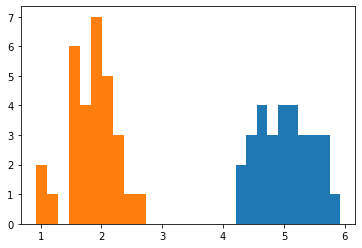

In [21]:
plt.hist(df.peso)
plt.hist(df.comprimento)

### Aumentando N ... faça simulações

(array([ 1.,  3.,  3.,  9.,  9., 20., 24., 28., 29., 26., 22.,  9.,  9.,
         3.,  5.]),
 array([0.88340068, 1.02492256, 1.16644444, 1.30796632, 1.44948819,
        1.59101007, 1.73253195, 1.87405383, 2.01557571, 2.15709759,
        2.29861947, 2.44014135, 2.58166323, 2.72318511, 2.86470698,
        3.00622886]),
 <BarContainer object of 15 artists>)

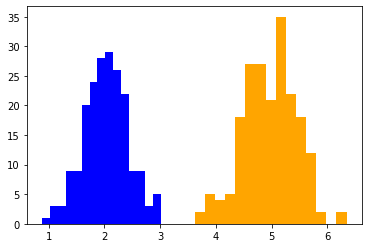

In [22]:
dic = {}
N = 200

dic['id'] = np.arange(0, N)
dic['peso'] = np.random.normal(5, .5, N)
dic['comprimento'] = np.random.normal(2, .4, N)

df = pd.DataFrame.from_dict(dic)

# o que são bins??
plt.hist(df.peso, bins=15, color='orange')
plt.hist(df.comprimento, bins=15, color='blue')

(array([ 5., 20., 59., 68., 36., 12.]),
 array([0.88340068, 1.23720538, 1.59101007, 1.94481477, 2.29861947,
        2.65242417, 3.00622886]),
 <BarContainer object of 6 artists>)

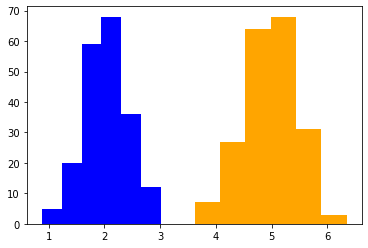

In [23]:
plt.hist(df.peso, bins=6, color='orange')
plt.hist(df.comprimento, bins=6, color='blue')

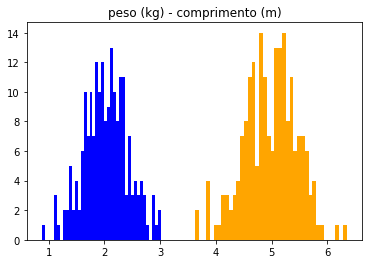

In [24]:
plt.hist(df.peso, bins=40, color='orange')
plt.hist(df.comprimento, bins=40, color='blue')
plt.title("peso (kg) - comprimento (m)");

### Na aula de gráficos veremos como criar vários frames (quadros)

### E aí? Os número 'bateram'? Algo a comentar?
  - Se sim, porquê?
  - Se não, porquê?

### Filtrando dados

filtrando 2 desvios padrões para mais e para menos

In [25]:
df.peso > df.peso.mean() + 2*df.peso.std()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: peso, Length: 200, dtype: bool

In [26]:
np.sum(df.peso > df.peso.mean() + 2*df.peso.std())

2

In [27]:
df[df.peso > df.peso.mean() + 2*df.peso.std()]

,id,peso,comprimento
51,51,6.187239,1.437151
109,109,6.342149,1.634754


### Vamos melhorar

In [28]:
mu  = df.peso.mean()
# sample standard deviation
ssd = df.peso.std()

limite_sup = mu + 2*ssd
limite_inf = mu - 2*ssd

"A média é %.1f (ssd=%.1f), e os limites são [%.1f, %.1f]"%(mu, ssd, limite_inf, limite_sup)

'A média é 5.0 (ssd=0.5), e os limites são [4.0, 5.9]'

### Dentro do esperado?

### Filtrar acima e abaixo da média (Pandas usa notação diferente!)

In [29]:
# Está errado? qual o erro
# and = & - and bitwise, notação binária 

df[(df.peso > limite_sup) & (df.peso < limite_inf)]

,id,peso,comprimento


### Tinha que dar vazio, certo? Porque?

In [30]:
### or = | - or bitwise, notação binária 

df[(df.peso > limite_sup) | (df.peso < limite_inf)]

,id,peso,comprimento
28,28,3.886539,1.719199
50,50,3.888884,1.839490
51,51,6.187239,1.437151
75,75,3.967975,1.703023
109,109,6.342149,1.634754
140,140,3.657045,1.389543
155,155,3.852520,1.735735
178,178,3.619962,2.431199
199,199,3.848594,2.336493


### Animais grandes: apenas 1 desvio padrão

In [31]:
lim_peso_sup =  df.peso.mean() + df.peso.std()
lim_comp_sup =  df.comprimento.mean() + df.comprimento.std()

# aqui uso & (and)
df[(df.peso >= lim_peso_sup) & (df.comprimento >= lim_comp_sup)]

,id,peso,comprimento
39,39,5.648459,3.006229
61,61,5.746212,2.941454
130,130,5.450247,2.495656


### Animais pequenos: apenas 1 desvio padrão

In [32]:
lim_peso_inf =  df.peso.mean() - df.peso.std()
lim_comp_inf =  df.comprimento.mean() - df.comprimento.std()

print(np.round(lim_peso_inf,2), 'kg ....', np.round(lim_comp_inf,2), 'm')

# aqui uso & (and)
df[(df.peso <= lim_peso_inf) & (df.comprimento <= lim_comp_inf)]

4.5 kg .... 1.63 m


,id,peso,comprimento
19,19,4.135882,1.536004
89,89,4.470537,1.626469
140,140,3.657045,1.389543
142,142,4.367627,1.589945
145,145,4.200741,1.518419


In [33]:
df[(df.peso <= lim_peso_inf)]

,id,peso,comprimento
7,7,4.363107,1.766348
9,9,4.224798,1.678347
10,10,4.465145,2.085304
19,19,4.135882,1.536004
20,20,4.183612,2.214392
25,25,4.283218,2.290263
28,28,3.886539,1.719199
45,45,4.479964,2.576376
46,46,4.379008,2.671310
47,47,4.385111,2.120169


In [34]:
df[(df.comprimento <= lim_comp_inf)]

,id,peso,comprimento
0,0,5.704284,1.138428
19,19,4.135882,1.536004
32,32,4.883271,1.406745
41,41,5.186470,1.562885
51,51,6.187239,1.437151
66,66,5.567078,1.617440
79,79,5.109054,1.268666
81,81,4.628605,1.275551
83,83,5.105190,1.124964
89,89,4.470537,1.626469


### A maquina randômica não criou animais super pequenos ou super grandes. Porque?

### O que é uma máquina randômica?

### Como você pode mostrar que é uma máquina randômica?

In [35]:
N = 30; i = 0

while(True):
    i += 1
    
    dic = {}

    dic['id'] = np.arange(0, N)
    dic['peso'] = np.random.normal(5, .5, N)
    dic['comprimento'] = np.random.normal(2, .4, N)

    df = pd.DataFrame.from_dict(dic)
    
    mu_peso  = df.peso.mean()
    ssd_peso = df.peso.std()
    
    mu_comp  = df.comprimento.mean()
    ssd_comp = df.comprimento.std()
    
    lim_peso_sup = mu_peso + 2*ssd_peso
    lim_comp_sup = mu_comp + 2*ssd_comp

   
    df = df[(df.peso > lim_peso_sup) & (df.comprimento > lim_comp_sup)]
    
    if len(df) > 0: 
        print("%d) <peso> = %.1f (%.1f),  <comp> = %.1f (%.1f), peso sup = %.1f kg, comp sup = %.1f m"%(i, 
               mu_peso, ssd_peso, mu_comp, ssd_comp, lim_peso_sup, lim_comp_sup) )
        break
        
df         

91) <peso> = 5.1 (0.6),  <comp> = 2.0 (0.4), peso sup = 6.2 kg, comp sup = 2.7 m


,id,peso,comprimento
25,25,6.565135,2.845237


### Qual o erro de peformance no meu algoritmo?

### Isto np.random.normal() é uma máquina estocástica? gerador de números numa distribuição normal?

### O que significa que consegui um valor após 257 tentativas?

In [36]:
100/257

0.38910505836575876

In [37]:
100/np.sqrt(257)

6.237828615518053

### 6% de chance de um fenomeno grande (ou pequeno ocorrer)

In [38]:
0.0624*0.0624

0.0038937599999999996

In [39]:
1./(0.0624*0.0624)

256.82117028270875

### p(raro) * p(raro) = p(raro) ^ 2
### 6.24% * 6.24% ~ 0.39% de dois fenômecnos ocorrerem

### Por isto que Ronald Fischer escolheu 5% como corte "do raro"?

https://en.wikipedia.org/wiki/P-value

https://en.wikipedia.org/wiki/Ronald_Fisher


### Markdown command: >> \![Ronald Fisher]\(../figure/ronald_fisher.jpg)

https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

![Ronald Fisher](../figure/ronald_fisher.jpg)

In [40]:
os.listdir("../figure")

['ronald_fisher.jpg',
 'carro_rendimento_por_cilindro.png',
 'meucarro.png',
 'carro_rendimento_por_cilindro_better_font.png']

### Localizando linhas e colunas

In [41]:
N = 20
dic = {}

dic['id'] = np.arange(0, N)
dic['peso'] = np.random.normal(5, .5, N)
dic['comprimento'] = np.random.normal(2, .4, N)
dic['comp_cabeca'] = np.random.normal(.4, .02, N)

df = pd.DataFrame.from_dict(dic)

df.head()

,id,peso,comprimento,comp_cabeca
0,0,5.476803,1.151864,0.405688
1,1,5.783827,1.969364,0.407632
2,2,4.661859,1.702380,0.400773
3,3,4.999547,1.967113,0.364346
4,4,5.644419,2.283718,0.425285


### Filtrando linhas 1,3 e 5 com df.iloc[ ]

In [42]:
df.iloc[[1,3,5]]

,id,peso,comprimento,comp_cabeca
1,1,5.783827,1.969364,0.407632
3,3,4.999547,1.967113,0.364346
5,5,4.049759,1.305365,0.359322


### Colunas

In [43]:
df.columns

Index(['id', 'peso', 'comprimento', 'comp_cabeca'], dtype='object')

### Selecionando colunas

In [44]:
df[ ['peso', 'comprimento'] ].head(3)

,peso,comprimento
0,5.476803,1.151864
1,5.783827,1.969364
2,4.661859,1.702380


### Selecionando as mesmas colunas 1 e 2 com df.iloc[ ]

os ':' selecionam todas as linhas\!   
mas, o head(3) filtra as primeiras 3 linhas  

In [45]:
df.iloc[:, 1:3].head(3)

,peso,comprimento
0,5.476803,1.151864
1,5.783827,1.969364
2,4.661859,1.702380


### Com df.loc não precisa do parênteses interno

Access a group of rows and columns by label(s) or a boolean array.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

In [46]:
df.loc[1:5]

,id,peso,comprimento,comp_cabeca
1,1,5.783827,1.969364,0.407632
2,2,4.661859,1.702380,0.400773
3,3,4.999547,1.967113,0.364346
4,4,5.644419,2.283718,0.425285
5,5,4.049759,1.305365,0.359322


In [47]:
df.loc[1:5, ['peso', 'comprimento']]

,peso,comprimento
1,5.783827,1.969364
2,4.661859,1.702380
3,4.999547,1.967113
4,5.644419,2.283718
5,4.049759,1.305365


In [48]:
df.loc[[1,3,5], ['peso', 'comprimento']]

,peso,comprimento
1,5.783827,1.969364
3,4.999547,1.967113
5,4.049759,1.305365


### Index

In [119]:
N = 5
dic = {}

dic['id'] = np.arange(0, N)
dic['peso'] = np.random.normal(5, .5, N)
dic['comprimento'] = np.random.normal(2, .4, N)
dic['comp_cabeca'] = np.random.normal(.4, .02, N)

df = pd.DataFrame.from_dict(dic)
df

,id,peso,comprimento,comp_cabeca
0,0,4.873455,1.368404,0.428007
1,1,4.325118,2.101066,0.400641
2,2,5.269329,2.418236,0.411073
3,3,5.789979,1.980724,0.419016
4,4,5.686710,3.093493,0.389742


### São objetos diferentes?

In [120]:
id(df), id(df2), id(df) != id(df2)

(140470431133648, 140470432748048, True)

### Dando nome para cada linha (índice, index)

In [121]:
df.index = ['Indian cobra', 'Coral', 'False coral', 'Bothrops jararaca', 'Bothrops terrificus']

In [122]:
df

,id,peso,comprimento,comp_cabeca
Indian cobra,0,4.873455,1.368404,0.428007
Coral,1,4.325118,2.101066,0.400641
False coral,2,5.269329,2.418236,0.411073
Bothrops jararaca,3,5.789979,1.980724,0.419016
Bothrops terrificus,4,5.686710,3.093493,0.389742


### Copiando uma tabela, para usar mais para frente

In [123]:
df2 = df.copy()

### Comparando dataframes = comparando matrizes (np.arrays)

In [125]:
df2 == df

,id,peso,comprimento,comp_cabeca
Indian cobra,True,True,True,True
Coral,True,True,True,True
False coral,True,True,True,True
Bothrops jararaca,True,True,True,True
Bothrops terrificus,True,True,True,True


### Usando loc nos índices

In [126]:
df.loc[['Coral', 'False coral']]

,id,peso,comprimento,comp_cabeca
Coral,1,4.325118,2.101066,0.400641
False coral,2,5.269329,2.418236,0.411073


In [127]:
df.loc[[True, False, False, True, True]]

,id,peso,comprimento,comp_cabeca
Indian cobra,0,4.873455,1.368404,0.428007
Bothrops jararaca,3,5.789979,1.980724,0.419016
Bothrops terrificus,4,5.686710,3.093493,0.389742


In [128]:
not_coral = [x for x in df.index if 'coral' not in x.lower()]
not_coral

['Indian cobra', 'Bothrops jararaca', 'Bothrops terrificus']

In [129]:
df.loc[not_coral]

,id,peso,comprimento,comp_cabeca
Indian cobra,0,4.873455,1.368404,0.428007
Bothrops jararaca,3,5.789979,1.980724,0.419016
Bothrops terrificus,4,5.686710,3.093493,0.389742


### Resetando índices (index)

In [130]:
df = df.reset_index()
df

,index,id,peso,comprimento,comp_cabeca
0,Indian cobra,0,4.873455,1.368404,0.428007
1,Coral,1,4.325118,2.101066,0.400641
2,False coral,2,5.269329,2.418236,0.411073
3,Bothrops jararaca,3,5.789979,1.980724,0.419016
4,Bothrops terrificus,4,5.686710,3.093493,0.389742


### Voltando os dados originais

In [131]:
df2

,id,peso,comprimento,comp_cabeca
Indian cobra,0,4.873455,1.368404,0.428007
Coral,1,4.325118,2.101066,0.400641
False coral,2,5.269329,2.418236,0.411073
Bothrops jararaca,3,5.789979,1.980724,0.419016
Bothrops terrificus,4,5.686710,3.093493,0.389742


In [132]:
df = df2.copy()
df = df.reset_index().rename(columns={'index': 'cobra'})
df

,cobra,id,peso,comprimento,comp_cabeca
0,Indian cobra,0,4.873455,1.368404,0.428007
1,Coral,1,4.325118,2.101066,0.400641
2,False coral,2,5.269329,2.418236,0.411073
3,Bothrops jararaca,3,5.789979,1.980724,0.419016
4,Bothrops terrificus,4,5.686710,3.093493,0.389742


In [137]:
df = df2.copy()
df.reset_index().rename(columns={'index': 'cobra'}, inplace=True)
df

,id,peso,comprimento,comp_cabeca
Indian cobra,0,4.873455,1.368404,0.428007
Coral,1,4.325118,2.101066,0.400641
False coral,2,5.269329,2.418236,0.411073
Bothrops jararaca,3,5.789979,1.980724,0.419016
Bothrops terrificus,4,5.686710,3.093493,0.389742


In [136]:
type(df)

NoneType